## Kết nối đến thư mục Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
project_path = '/content/drive/MyDrive/Project-EdgeAI/Dataset/M10K03_EdgeAI_Dataset_2'
os.chdir(project_path)

print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive/Project-EdgeAI/Dataset/M10K03_EdgeAI_Dataset_2


## Pytorch DataLoader

### Load dữ liệu đã được trích xuất đặc trưng (Fall Detection)

In [7]:
import glob
import os

with open(r'fall_detection/features.txt', 'r') as txt_file:
  data_str_lst = txt_file.readlines()

print(data_str_lst[0])
data_lst = []
label_lst = []

for data_str in data_str_lst:
  data_lst.append([float(data) for data in data_str.strip().split(' ')[1:]])
  label_lst.append(data_str.strip().split(' ')[0])

print(f'Phân loại: {list(set(label_lst))}')

# Chuyển tên phân loại sang dạng id phân loại
label_lst = list(map(lambda x: list(set(label_lst)).index(x), label_lst))
print(set(label_lst))

Sitting 2.81912075017167 0.0447943794552003 -1.3637351990604023 6208.572739654652 3256.482781126813 843.6201751676557 40.36278282106989 242.95739340038492 392.48383064697805 4.840914671851674 22.729457190825503 8.257316462040478 0.4917745836562882 0.29413899469077487 53897.88482701503 28443.009518860938 7399.8639451184345 91.92804712749363 1625.6589434148143 3016.4556146717364 4.836122271125441 22.663652976908992 4.177778776951679 0.20954398681337416 -1.2927202443941603 13716.02579451568 7096.205532392347 1732.212319229732 9.324356380084016 519.7776108429363 865.5996656554024 4.862771878561747 22.941297258897485

Phân loại: ['Sitting', 'Walking', 'Stairs', 'Fall', 'Standing']
{0, 1, 2, 3, 4}


### Tạo class DataSet

In [8]:
import torch
from torch.utils.data import Dataset

class FallDetectionDataset(Dataset):
    def __init__(self, data, labels, num_classes):
        self.data = data  # Dữ liệu đầu vào
        self.labels = labels  # phân loại tương ứng
        self.num_classes = num_classes

    def __len__(self):
        return len(self.data)  # Số lượng mẫu trong dataset

    def __getitem__(self, idx):
        # Trả về một cặp (dữ liệu, nhãn) cho chỉ số idx
        sample = torch.tensor(self.data[idx], dtype=torch.float32)  # Chuyển data thành tensor
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Chuyển label thành tensor

        # One-hot encoding (chỉ thực hiện khi cần thiết)
        one_hot_label = torch.zeros(self.num_classes)
        one_hot_label[label] = 1
        return sample, one_hot_label

### Ứng dụng Dataloader

In [2]:
from torch.utils.data import DataLoader

# Tạo một đối tượng Dataset
dataset = FallDetectionDataset(data_lst, label_lst, 5)

# Tạo DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Lặp qua các batch
for batch_data, batch_labels in dataloader:
    print(batch_data.size(), batch_labels.size())
    print(batch_data)
    print(batch_labels)
    # Hàm huấn luyện ....

    # Hàm đánh giá trong quá trình huấn luyện ....

NameError: name 'FallDetectionDataset' is not defined

### Load dữ liệu đã được trích xuất đặc trưng (HeartRate)

In [10]:
import glob
import os


with open(r'HeartRate/features.txt', 'r') as txt_file:
  data_str_lst = txt_file.readlines()

print(data_str_lst[0])
data_lst = []
label_lst = []

for data_str in data_str_lst:
  data_lst.append([float(data) for data in data_str.strip().split(' ')[1:]])
  label_lst.append(float(data_str.strip().split(' ')[0]))
print(data_lst[0])
print(label_lst[0])

70.8 0.20474853342910948 50.88500092702066 -0.06410439274102571 309.9821405648006 1208.0792682926829 229.02790288937203 1125.0 177.64723378941105 100.0 850.0 1093.75 1375.0 1406.25 281.25 309.9782991959482 161.94718321400904 219.18775738212747 1.3534521134120405 1.9431936148641753 33.042061931682674 152.8301424405276 3301.689269495722 0.0005885452737231586 0.010007623139148191 0.04628846931554824 0.21620121138433593 1.2040230795930345 6.821311751884044 11.472325674696231

[0.20474853342910948, 50.88500092702066, -0.06410439274102571, 309.9821405648006, 1208.0792682926829, 229.02790288937203, 1125.0, 177.64723378941105, 100.0, 850.0, 1093.75, 1375.0, 1406.25, 281.25, 309.9782991959482, 161.94718321400904, 219.18775738212747, 1.3534521134120405, 1.9431936148641753, 33.042061931682674, 152.8301424405276, 3301.689269495722, 0.0005885452737231586, 0.010007623139148191, 0.04628846931554824, 0.21620121138433593, 1.2040230795930345, 6.821311751884044, 11.472325674696231]
70.8


### Tạo class DataSet

In [11]:
class HeartRateDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data  # Dữ liệu đầu vào
        self.labels = labels  # phân loại tương ứng

    def __len__(self):
        return len(self.data)  # Số lượng mẫu trong dataset

    def __getitem__(self, idx):
        # Trả về một cặp (dữ liệu, nhãn) cho chỉ số idx
        sample = torch.tensor(self.data[idx], dtype=torch.float32)  # Chuyển data thành tensor
        label = torch.tensor(self.labels[idx], dtype=torch.float32)  # Chuyển label thành tensor
        return sample, label

### Ứng dụng Dataloader

In [12]:
from torch.utils.data import DataLoader

# Tạo một đối tượng Dataset
dataset = HeartRateDataset(data_lst, label_lst)

# Tạo DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Lặp qua các batch
for batch_data, batch_labels in dataloader:
    print(batch_data.size(), batch_labels.size())
    print(batch_data)
    print(batch_labels)
    # Hàm huấn luyện ....

    # Hàm đánh giá trong quá trình huấn luyện ....

    break

torch.Size([32, 29]) torch.Size([32])
tensor([[-7.1466e-01,  6.3525e+01,  4.4676e-02,  4.0037e+02,  1.0092e+03,
          2.7676e+02,  1.2188e+03,  2.1049e+02,  1.0000e+02,  7.1875e+02,
          8.1250e+02,  1.1484e+03,  1.3844e+03,  3.3594e+02,  4.0036e+02,
          1.9570e+02,  2.8310e+02,  1.4466e+00,  4.5275e+00,  8.1553e+01,
          4.5069e+02,  6.0337e+03,  7.5038e-04,  1.3516e-02,  7.4696e-02,
          1.8095e-01,  1.4779e+00,  1.3738e+01,  4.8626e+01],
        [ 9.4398e-01,  6.5137e+01, -5.9723e-02,  4.9824e+02,  1.0051e+03,
          3.4898e+02,  2.0000e+03,  2.5508e+02,  1.0000e+02,  6.8750e+02,
          7.5000e+02,  1.1797e+03,  1.4375e+03,  4.2969e+02,  4.9823e+02,
          2.4676e+02,  3.5230e+02,  1.4277e+00,  1.0346e+01,  2.3182e+02,
          8.9937e+02,  8.4597e+03,  1.2229e-03,  2.7403e-02,  1.0631e-01,
          2.5776e-01,  2.9928e+00,  5.7029e+01,  7.4532e+01],
        [-2.4450e-01,  6.1771e+01,  8.9178e-03,  3.3445e+02,  1.0164e+03,
          2.8002e+02,  1

### Load dữ liệu đã được trích xuất đặc trưng (IllegalLoggingDetection)

In [ ]:
import glob
import os
import numpy as np


root_path = r'IllegalLoggingDetection/features'

print(data_str_lst[0])
data_lst = []
label_lst = []

for data_path in glob.glob(os.path.join(root_path, '*.npy')):
  label_lst.append(os.path.basename(data_path).split('.')[0])
  data_lst.append(data_path)

print(f'Phân loại: {list(set(label_lst))}')

# Chuyển tên phân loại sang dạng id phân loại
label_lst = list(map(lambda x: list(set(label_lst)).index(x), label_lst))
print(set(label_lst))

print(data_lst[0])
print(label_lst[0])

70.8 0.20474853342910948 50.88500092702066 -0.06410439274102571 309.9821405648006 1208.0792682926829 229.02790288937203 1125.0 177.64723378941105 100.0 850.0 1093.75 1375.0 1406.25 281.25 309.9782991959482 161.94718321400904 219.18775738212747 1.3534521134120405 1.9431936148641753 33.042061931682674 152.8301424405276 3301.689269495722 0.0005885452737231586 0.010007623139148191 0.04628846931554824 0.21620121138433593 1.2040230795930345 6.821311751884044 11.472325674696231

Phân loại: ['Z_Background', 'Chainsaw']
{0, 1}
IllegalLoggingDetection/features/Z_Background.00007.npy
0


### Tạo class DataSet

In [ ]:
import numpy as np


class IllegalLoggingDetectionDataset(Dataset):
    def __init__(self, data, labels, num_classes):
        self.data = data  # Dữ liệu đầu vào
        self.labels = labels  # phân loại tương ứng
        self.num_classes = num_classes

    def __len__(self):
        return len(self.data)  # Số lượng mẫu trong dataset

    def __getitem__(self, idx):
        # Trả về một cặp (dữ liệu, nhãn) cho chỉ số idx
        waveform = np.load(self.data[idx])
        sample = torch.tensor(waveform, dtype=torch.float32)  # Chuyển data thành tensor
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Chuyển label thành tensor

        # One-hot encoding (chỉ thực hiện khi cần thiết)
        one_hot_label = torch.zeros(self.num_classes)
        one_hot_label[label] = 1
        return sample, one_hot_label

### Ứng dụng Dataloader

In [ ]:
from torch.utils.data import DataLoader

# Tạo một đối tượng Dataset
dataset = IllegalLoggingDetectionDataset(data_lst, label_lst, 2)

# Tạo DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Lặp qua các batch
for batch_data, batch_labels in dataloader:
    print(batch_data.size(), batch_labels.size())
    print(batch_data)
    print(batch_labels)
    # Hàm huấn luyện ....

    # Hàm đánh giá trong quá trình huấn luyện ....

    break

torch.Size([32, 1680]) torch.Size([32, 2])
tensor([[0.6252, 0.7326, 0.8354,  ..., 0.4580, 0.4363, 0.4376],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.6121, 0.6489, 0.6568,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.6906, 0.5909, 0.6483,  ..., 0.1784, 0.1656, 0.2065],
        [0.5293, 0.5139, 0.3668,  ..., 0.1127, 0.0782, 0.1423],
        [0.6438, 0.6882, 0.6461,  ..., 0.4430, 0.3801, 0.3037]])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
 

### Load dữ liệu đã được trích xuất đặc trưng (Responding to your voice)

In [ ]:
import glob
import os
import numpy as np


root_path = r'Responding2YourVoice/features'

print(data_str_lst[0])
data_lst = []
label_lst = []

for data_path in glob.glob(os.path.join(root_path, '*.npy')):
  label_lst.append(os.path.basename(data_path).split('.')[0])
  data_lst.append(data_path)

print(f'Phân loại: {list(set(label_lst))}')

# Chuyển tên phân loại sang dạng id phân loại
label_lst = list(map(lambda x: list(set(label_lst)).index(x), label_lst))
print(set(label_lst))

print(data_lst[0])
print(label_lst[0])

70.8 0.20474853342910948 50.88500092702066 -0.06410439274102571 309.9821405648006 1208.0792682926829 229.02790288937203 1125.0 177.64723378941105 100.0 850.0 1093.75 1375.0 1406.25 281.25 309.9782991959482 161.94718321400904 219.18775738212747 1.3534521134120405 1.9431936148641753 33.042061931682674 152.8301424405276 3301.689269495722 0.0005885452737231586 0.010007623139148191 0.04628846931554824 0.21620121138433593 1.2040230795930345 6.821311751884044 11.472325674696231

Phân loại: ['helloworld', 'noise', 'unknown']
{0, 1, 2}
Responding2YourVoice/features/noise.00278.npy
1


### Tạo class DataSet

In [ ]:
import numpy as np


class Responding2YourVoiceDataset(Dataset):
    def __init__(self, data, labels, num_classes):
        self.data = data  # Dữ liệu đầu vào
        self.labels = labels  # phân loại tương ứng
        self.num_classes = num_classes

    def __len__(self):
        return len(self.data)  # Số lượng mẫu trong dataset

    def __getitem__(self, idx):
        # Trả về một cặp (dữ liệu, nhãn) cho chỉ số idx
        waveform = np.load(self.data[idx])
        sample = torch.tensor(waveform, dtype=torch.float32)  # Chuyển data thành tensor
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Chuyển label thành tensor

        # One-hot encoding (chỉ thực hiện khi cần thiết)
        one_hot_label = torch.zeros(self.num_classes)
        one_hot_label[label] = 1
        return sample, one_hot_label

### Ứng dụng Dataloader

In [ ]:
from torch.utils.data import DataLoader

# Tạo một đối tượng Dataset
dataset = Responding2YourVoiceDataset(data_lst, label_lst, 3)

# Tạo DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Lặp qua các batch
for batch_data, batch_labels in dataloader:
    print(batch_data.size(), batch_labels.size())
    print(batch_data)
    print(batch_labels)
    # Hàm huấn luyện ....

    # Hàm đánh giá trong quá trình huấn luyện ....

    break

torch.Size([32, 13, 51]) torch.Size([32, 3])
tensor([[[0.0000e+00, 3.2265e-02, 1.9778e-02,  ..., 5.6463e-02,
          6.5683e-02, 5.1212e-02],
         [8.6166e-01, 8.6829e-01, 8.7362e-01,  ..., 8.6810e-01,
          8.7103e-01, 8.7457e-01],
         [8.5158e-01, 8.5521e-01, 8.6143e-01,  ..., 8.6331e-01,
          8.5683e-01, 8.6140e-01],
         ...,
         [8.4197e-01, 8.4551e-01, 8.4836e-01,  ..., 8.3617e-01,
          8.4331e-01, 8.4512e-01],
         [8.4213e-01, 8.4790e-01, 8.4911e-01,  ..., 8.3949e-01,
          8.4829e-01, 8.3740e-01],
         [8.3521e-01, 8.4903e-01, 8.4429e-01,  ..., 8.4845e-01,
          8.3668e-01, 8.4736e-01]],

        [[0.0000e+00, 3.0554e-02, 3.3456e-02,  ..., 1.5605e-01,
          1.1281e-01, 1.5172e-01],
         [8.4059e-01, 8.4751e-01, 8.4609e-01,  ..., 8.5407e-01,
          8.5563e-01, 8.9858e-01],
         [7.9093e-01, 8.0336e-01, 8.0947e-01,  ..., 8.4650e-01,
          8.2516e-01, 8.2675e-01],
         ...,
         [8.0814e-01, 8.1392e-01, 

### Load dữ liệu CarDetection

In [ ]:
import glob
import os
import json


root_path = r'CarDetection'

anno_name = r'bounding_boxes.labels'

data_lst = []
bbox_lst = []
label_lst = []

cls_lst = ['car', 'truck']

for dir_name in ['training', 'testing']:
  with open(os.path.join(root_path, dir_name, anno_name), 'r') as labels_file:
    labels_json = json.load(labels_file).get('boundingBoxes')
  for img_name, bboxes in labels_json.items():
    img_path = os.path.join(root_path, dir_name, img_name)
    if os.path.exists(img_path):
      data_lst.append(img_path)
      label_lst.append([cls_lst.index(box.get('label')) for box in bboxes])
      bbox_lst.append([[box.get('x'), box.get('y'), box.get('width'), box.get('height')] for box in bboxes])

print(f'Tổng số dữ liệu: {len(data_lst)}')
print(data_lst[0])
print(len(bbox_lst[0]), bbox_lst[0])
print(len(label_lst[0]), label_lst[0])

Tổng số dữ liệu: 127
CarDetection/training/Parking_data_1812.png.2u0729sk.ingestion-5b7fdf699d-lvsw6.jpg
14 [[2, 108, 24, 27], [582, 78, 58, 47], [346, 93, 86, 39], [462, 82, 84, 42], [186, 100, 84, 39], [580, 150, 60, 59], [2, 220, 68, 60], [254, 231, 64, 71], [570, 228, 68, 74], [482, 225, 86, 83], [214, 390, 172, 89], [176, 229, 61, 72], [277, 92, 78, 42], [323, 212, 73, 90]]
14 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Hiển thị hình ảnh và vẽ bbox

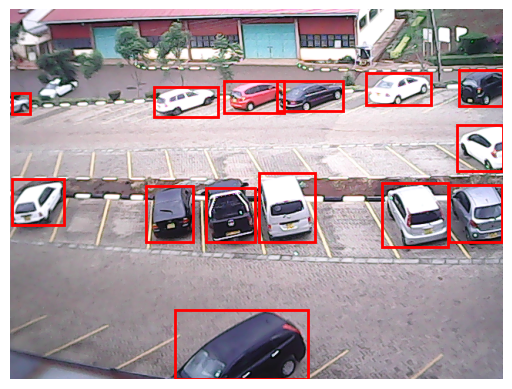

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


img = Image.open(data_lst[0])

# Khởi tạo figure và axis
fig, ax = plt.subplots()

# Hiển thị ảnh lên trục
ax.imshow(img)

for bbox in bbox_lst[0]:
  x, y, width, height = bbox
  rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

# Tắt trục tọa độ
plt.axis('off')

# Hiển thị ảnh với bounding boxes
plt.show()

### Tạo Class Dataset

In [ ]:
from PIL import Image


class CarDetectionDataset(Dataset):
    def __init__(self, data, boxes, labels, num_classes, transform=None):
        self.data = data  # Dữ liệu đầu vào
        self.boxes = boxes  # bounding boxes
        self.labels = labels  # Phân loại tương ứng
        self.num_classes = num_classes # Số phân loại
        self.transform = transform # Biến đổi áp dụng cho ảnh

    def __len__(self):
        return len(self.data)  # Số lượng mẫu trong dataset

    def __getitem__(self, idx):
        # Trả về một cặp (dữ liệu, nhãn) cho chỉ số idx
        # Đọc ảnh
        image = Image.open(self.data[idx]).convert('RGB')  # Đọc ảnh và chuyển thành RGB

        # Chuyển bounding boxes và labels thành tensor
        boxes = torch.tensor(self.boxes[idx], dtype=torch.float32)
        labels = torch.tensor(self.labels[idx], dtype=torch.long)

        # Nếu có biến đổi, áp dụng nó
        if self.transform:
          image = self.transform(image)
        else:
          image = torch.tensor(image, dtype=torch.float32)

        return image, boxes, labels

### Thêm padding vào bbox và label

In [ ]:
def pad_bounding_boxes(boxes, max_num_boxes):
    """Padding các bounding boxes với giá trị mặc định nếu số lượng bounding boxes ít hơn max_num_boxes"""
    padding = torch.zeros((max_num_boxes - boxes.size(0), 4))  # Padding bằng các bounding boxes không có đối tượng
    return torch.cat([boxes, padding], dim=0)  # Gộp các bounding boxes với padding

def collate_fn(batch):
    """Hàm collate cho DataLoader, xử lý khi batch chứa các kích thước không đồng đều"""
    images, boxes, labels = zip(*batch)

    # Tính số lượng bounding boxes lớn nhất trong batch
    max_num_boxes = max([box.size(0) for box in boxes])

    # Padding các bounding boxes để chúng có cùng số lượng
    boxes = [pad_bounding_boxes(box, max_num_boxes) for box in boxes]

    # Chuyển images thành tensor
    images = torch.stack(images, dim=0)

    # Chuyển labels thành tensor
    labels = pad_sequence(labels, batch_first=True, padding_value=-1)  # Padding labels nếu cần

    return images, torch.stack(boxes), labels

### Ứng dụng DataLoader

In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms


transform = transforms.Compose([
    transforms.Resize((300, 300)),  # Thay đổi kích thước ảnh
    transforms.ToTensor(),  # Chuyển ảnh thành tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Chuẩn hóa ảnh (ví dụ cho ảnh RGB)
])

# Tạo một đối tượng Dataset
dataset = CarDetectionDataset(data_lst, bbox_lst, label_lst, 2, transform)

# Tạo DataLoader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

# Lặp qua các batch
for batch_data, batch_boxes, batch_labels in dataloader:
    print(batch_data.size(), batch_boxes.size(), batch_labels.size())
    print(batch_boxes[0])
    print(batch_labels[0])
    # Hàm huấn luyện ....

    # Hàm đánh giá trong quá trình huấn luyện ....

    break

torch.Size([8, 3, 300, 300]) torch.Size([8, 24, 4]) torch.Size([8, 24])
tensor([[347.,  93.,  89.,  45.],
        [285.,  92.,  71.,  40.],
        [186., 101.,  79.,  37.],
        [465.,  78.,  85.,  52.],
        [578.,  72.,  61.,  59.],
        [393., 150.,  82.,  72.],
        [185., 223.,  57.,  79.],
        [252., 216.,  73.,  86.],
        [327., 215.,  71.,  86.],
        [482., 220.,  87.,  89.],
        [573., 220.,  67.,  91.],
        [  1., 216.,  73.,  67.],
        [  3., 374.,  56.,  53.],
        [211., 391., 202.,  89.],
        [486., 443., 117.,  37.],
        [  0., 110.,  28.,  35.],
        [580., 150.,  60.,  55.],
        [262., 130., 110.,  41.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1, -1, -1, -1, -1, -1]